In [1]:
import pandas as pd 
import numpy as np
import re
import whois
import requests
import json
import sys
import urllib.request
from bs4 import BeautifulSoup

#Phishing : 1
#Legit : 0
#Suspicious : 2

def alive(url):
    try:
        check = urllib.request.urlopen(url).getcode()
        if check == 200:
            return 1
        else:
            return 0
    except:
        return 0

def url_length(url):
    if len(url) >= 54 :
        return 2
    else:
        return 0

def redirect(url):
    if "//" in str(url[7:]):
        return 1
    else: 
        return 0 

def symbol(url):
    if "@" in url:
        return 1
    else:
        return 0 

def ip_in_url(url):
    match=re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  #IPv4
                        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  #IPv4 in hexadecimal
                        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)
    if match:   
        return 1
    else:
        return 0


def sub_domain(url):
    if url.count(".") >=3:
        return 2
    else:
        return 0

def puny(url):
    import idna
    try:
        url = ' '.join(repr(x).lstrip('u')[1:-1] for x in url)
        domain = url.split("/")
        if "xn--" in str(idna.encode(name[2])):
            return 1
    except:
        return 0

def protocol_in_domain(url):
    if "https" in url or "http" in url:
        return 1
    else:
        return 0

def http_notsafe(url):
    protocol = url.split("/")
    if protocol[0] == 'http:':
        return 2
    else:
        return 0
def shorten(url):
    match=re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net',url)
    if match:
        return 2 
    else:
        return 0

def age_of_domain(url):
#     try:
    w = whois.whois(url)
    start_date = w.creation_date
    current_date = datetime.datetime.now()
    age =(current_date-start_date).days
    if(age>=180):
        return 0
    else:
        return 2
#     except Exception as e:
#         return 0

In [2]:
df = pd.read_csv("dataset/file.csv")
data = pd.read_csv("dataset/data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2,0,0,0,0,0,0,1,2,0,0
1,2,2,0,0,0,2,0,1,0,0,0
2,2,0,0,0,0,0,0,1,0,0,0
3,2,0,0,0,0,0,0,1,2,0,0
4,2,0,0,0,0,0,0,1,2,2,0


In [3]:
col_new = ["class", "url_length","redirect","symbol","ip_in_url","sub_domain","puny", "protocol_in_domain", "http_notsafe","shorten","age_of_domain"]

In [4]:
df.columns = col_new
for col in col_new:
    print("{} value: ".format(col))
    print(df[col].value_counts())

class value: 
0    30000
1    21341
2    10197
Name: class, dtype: int64
url_length value: 
0    42758
2    18780
Name: url_length, dtype: int64
redirect value: 
0    61332
1      206
Name: redirect, dtype: int64
symbol value: 
0    60600
1      938
Name: symbol, dtype: int64
ip_in_url value: 
0    60139
1     1399
Name: ip_in_url, dtype: int64
sub_domain value: 
0    49787
2    11751
Name: sub_domain, dtype: int64
puny value: 
0    61538
Name: puny, dtype: int64
protocol_in_domain value: 
1    31537
0    30001
Name: protocol_in_domain, dtype: int64
http_notsafe value: 
0    44656
2    16882
Name: http_notsafe, dtype: int64
shorten value: 
0    58323
2     3215
Name: shorten, dtype: int64
age_of_domain value: 
0    61538
Name: age_of_domain, dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

drop_f = []
for col in col_new:
    if(np.unique(df[col].values).shape[0] == 1):
        drop_f.append(col)

In [6]:
df.drop(drop_f, axis = 1, inplace = True)
df.head()

,class,url_length,redirect,symbol,ip_in_url,sub_domain,protocol_in_domain,http_notsafe,shorten
0,2,0,0,0,0,0,1,2,0
1,2,2,0,0,0,2,1,0,0
2,2,0,0,0,0,0,1,0,0
3,2,0,0,0,0,0,1,2,0
4,2,0,0,0,0,0,1,2,2


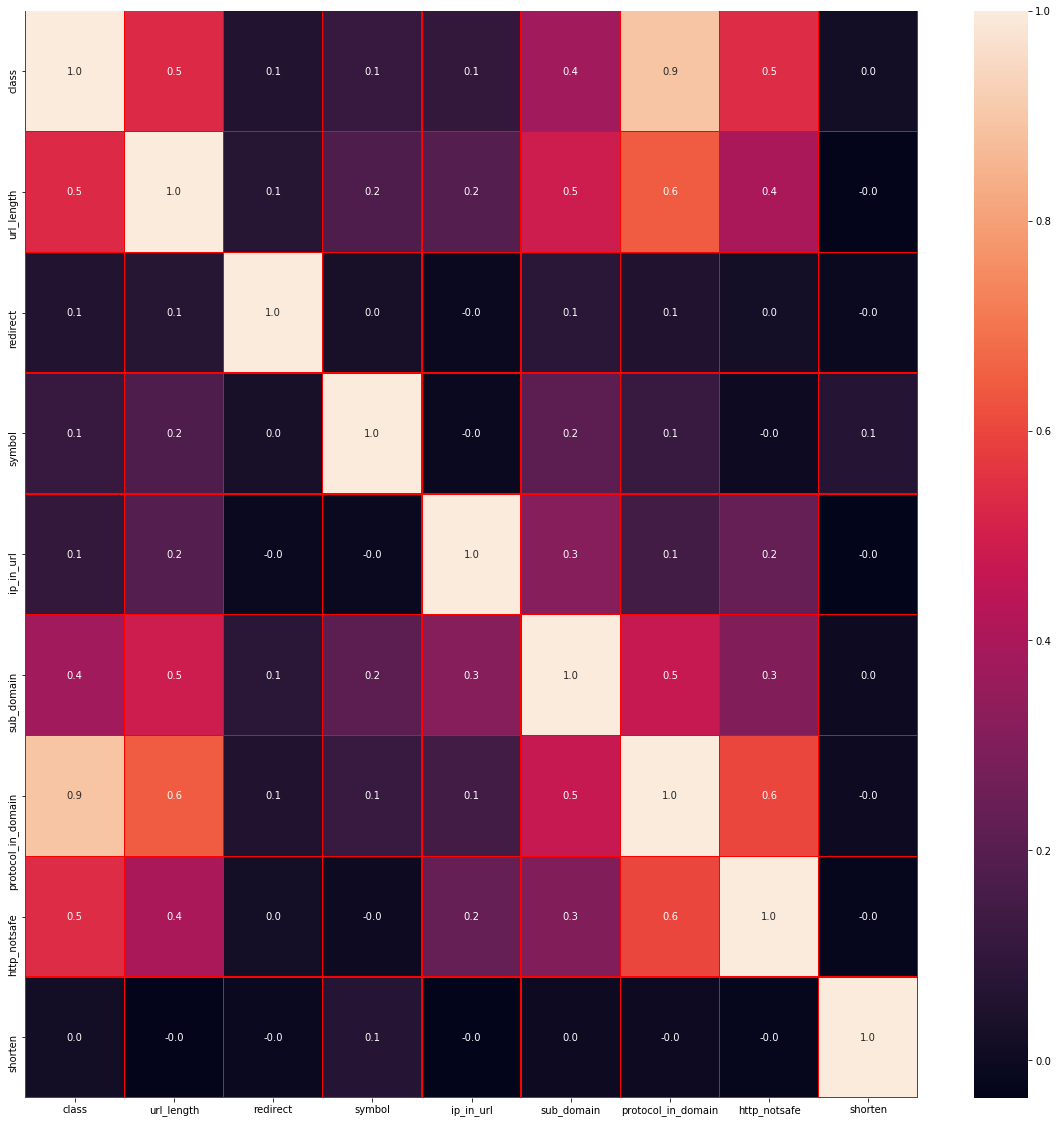

In [7]:
f_corr = df.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(f_corr, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [43]:
merge_f = ["redirect", "symbol", "ip_in_url"]
idx_ls = []
for idx, name in enumerate(merge_f):
#     f, ax = plt.subplots(3, 1, idx)
    print(df[["class", name]].groupby("class").mean())
    idx_ls.append(df.loc[df[name] != 0, name].index)


       redirect
class          
0      0.000000
1      0.005670
2      0.008336
         symbol
class          
0      0.000000
1      0.027225
2      0.035010
       ip_in_url
class           
0       0.000000
1       0.054168
2       0.023831


In [44]:
idx_ls = [k for ls in idx_ls for k in ls]
idx_ls = list(set(idx_ls))


In [45]:
df["Have_Slash_Symbol_IP"] = 0
df.iloc[idx_ls, -1] = 1
df[["class", "Have_Slash_Symbol_IP"]].groupby("class").mean()

,Have_Slash_Symbol_IP
class,
0,0.000000
1,0.086219
2,0.065804


In [46]:
df["Have_Slash_Symbol_IP"].value_counts()

0    59027
1     2511
Name: Have_Slash_Symbol_IP, dtype: int64

In [49]:
df.drop(merge_f, axis = 1, inplace = True)
df.head()

,class,url_length,sub_domain,protocol_in_domain,http_notsafe,shorten,Have_Slash_Symbol_IP
0,2,0,0,1,2,0,0
1,2,2,2,1,0,0,0
2,2,0,0,1,0,0,0
3,2,0,0,1,2,0,0
4,2,0,0,1,2,2,0


In [76]:
import requests
from lxml.html import fromstring
val_ls = []
error_con = []
for web in data.iloc[2, :].values[100:]:
    print("webname: " + web)
    try:
         r = requests.get(web)
    except:
        error_con.append(web)
        print("Error!!!")
        continue
    tree = fromstring(r.content)
    title = tree.findtext('.//title')
    print(title)
    val_ls.append(str(title))

webname: https://storage.googleapis.com/aoffice365-marquisette-235432838/index.html
None
webname: https://odkazinpost.net/x6Dvvu7V/pdZ9ikK6-ipko/login.php?pid=zpIexm
Website Suspended
webname: http://wzlzsopole.pl.projekt2019.pl/home/myaccount/vbv.php?websrc=ad3a9d2b11e818978d5ef36c7b424686&amp;dispatched=89&amp;id=3214706816
404 Not Found
webname: http://wzlzsopole.pl.projekt2019.pl/home/myaccount/uploads/index.php?websrc=e17ea285ad581008aac6b89b49ab879e&amp;dispatched=55&amp;id=3241688588
404 Not Found
webname: http://www.zeshiyang.com/boa/boa/boa/mobileindex.html?cmd=login_submit&amp;id=73907794df53d79acfc3bfdf15116d07&amp;session=73907794df53d79acfc3bfdf15116d07
None
webname: http://www.zeshiyang.com/boa/boa/boa/mainindex.html?cmd=login_submit&id=4b040bffe2e320ae33ce32e36e2482bd&session=4b040bffe2e320ae33ce32e36e2482bd
None
webname: http://www.roithai.com/picture/image/session/PPL8327489723483329/Update/newdir.php
None
webname: https://776531.com/phplive/phplive.php
Error!!!
webnam

In [91]:
def digitcount(url):
    return sum([1 for c in url if c.isdigit()])

In [81]:

from sklearn.model_selection import train_test_split
x = df.drop("class", axis = 1).values
y = df["class"].values



In [103]:
digit_c = []
num = np.zeros(data.shape[0])
for row in range(data.shape[0]):
    for col in range(data.shape[1]):
        if isinstance(data.iloc[row, col], str):
           digit_c.append(digitcount(data.iloc[row, col])) 
           num[row] += 1 
num = list(map(int, num))

In [114]:
num[1] = num[1]+num[0]
num[0] = 0
sum_ = []
for i in range(3):
    sum_.append(sum(digit_c[num[i]:num[i+1]+num[i]]))
sum_

[250865, 167244, 354149]

In [115]:
means = [k/v for k, v in zip(sum_, num[1:])]

In [116]:
means

[10.548967663260585, 21.552061855670104, 11.80457318089397]